# Function Transformer
Function transformers are essential components in data preprocessing pipelines for machine learning algorithms. They are used to transform the input data into a format more suitable for machine learning models. Function transformers can be used to perform various operations such as scaling, normalization, missing value imputation, and feature selection.

The scikit-learn library provides a convenient way to create function transformers using the FunctionTransformer class. This class allows you to apply arbitrary functions to your input data and can be used in conjunction with other scikit-learn preprocessing tools such as Pipeline and ColumnTransformer. Function transformers are especially useful when dealing with nonlinear data or when the input data is in non-standard form. For example, if you have a data set that contains a mix of numeric and categorical data, you can use function transformers to apply different transformations to different types of data.

Overall, function transformers provide a flexible and powerful tool for preparing data for machine learning models and are an important part of any machine learning pipeline. 

**Modules**
* Numpy
* Pandas
* Matplotlib
* Seaborn

**Note**
* The dataset used it [this](https://www.kaggle.com/competitions/titanic/data?select=train.csv)

Here we will try to make our own transformations 

In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [58]:
data = pd.read_csv("/content/train.csv")

In [59]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


`Fare` seems to be a good one for this, so we will be focusing on this

In [60]:
sample_data = data["Fare"]

Skew is :  4.787316519674893


<AxesSubplot:xlabel='Fare', ylabel='Density'>

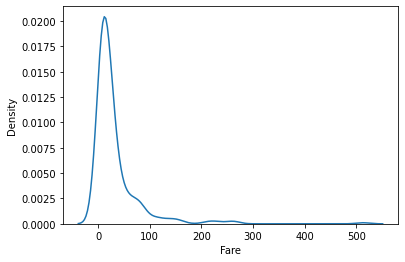

In [61]:
print("Skew is : " , sample_data.skew())
sns.kdeplot(sample_data)

As you can see the skewness is $4.78$, models like gaussian disitribution graph, so our main motive is to minimize the skewess and make the curve more like a bell shaped. There are majorly four methods for doing this 
* Log Transformer
* Square Transformer
* Box-Cox Transformer
* Yeo-Johnson Transformer

# Log Transformer

In machine learning, a log transformer is a data preprocessing technique used to transform data by taking the logarithm of the values. This technique is often used when dealing with data with skewed distributions, where most data points are clustered around some value and some extreme values ​​are much higher or lower than others. will be used.

Taking the logarithm of the data transforms the values ​​into a more normal distribution, making them easier to work with in machine learning models. Additionally, the logarithmic transformation helps reduce the effects of outliers, as extreme values ​​are "pulled" towards the mean of the data.

Log transformations can be applied to different types of data depending on the context and specific problem. B. Numeric or categorical data. However, it is important to note that logarithmic transformation is not always appropriate and other techniques such as feature scaling and normalization may be more appropriate.

Overall, log transformers are useful machine learning tools for preprocessing data and improving model performance. 

For changing every value in an array, we simply need to iterate over the array and change the values. We will first try to access these values. As it can go very further, we will limit the output to $5$ lines

In [62]:
count = 0
for i in sample_data: #-----|
    print(i) #--------------|=======> Main code
    count +=1
    if count == 5:
        break

7.25
71.2833
7.925
53.1
8.05


Now we will try to make a new array, and add these values in that array, we will transform the values afterward, but first we will try to populate a new array 

In [63]:
new_array = np.array([])
for i in sample_data:
    new_array = np.vstack([new_array , i])

ValueError: ignored

As we can see there is an error, regarding the incorrect shape. It says the array you are trying to stack is of $(1 , 1)$ but the arrays you are trying to stck in is of shape $(0 , 0)$. 

So we need to make an empty array of the same shape.

In [64]:
new_array = np.empty(shape = (1 , 1))
for i in sample_data:
    new_array = np.vstack([new_array , i])

In [65]:
# new_array # Not printing this as it will take a lot of unescessory space, if you want to see, just comment it out

So now our most of the work is done, now we just need to change the value of `i` according to our need, for simplicity we will just create a function for this 

In [66]:
def log_output(value):
    return np.log1p(value)

new_array = np.empty(shape = (1 , 1))
for i in sample_data:
    new_array = np.vstack([new_array , log_output(i)])


In [67]:
# new_array # Not printing this as it will take a lot of unescessory space, if you want to see, just comment it out

Lets try to plot this on a graph

In [68]:
print("Skew is : " , new_array.skew())
sns.kdeplot(new_array)

AttributeError: ignored

Okay so `numpy.ndarray` do not have attribute `skew`. Its right, `.skew()` exist only for dataframes, so we will be creating our own skew function

In [69]:
print("Skew is : " , pd.DataFrame(new_array).skew())
sns.kdeplot(pd.DataFrame(new_array))

Skew is :  0    0.4935
dtype: float64


ValueError: ignored

Okay, this shouldnt be an error, cause the dataframe only has $1$ column(s), so why this error occured. Lets try to find out the shape of our array

In [70]:
new_array.shape

(892, 1)

Wait Wait Wait, there shoudl be $891$ but there are $892$, but how???

The answer is we are horizontally stacking the values, in an empty array, (not replacing them), So there is a garbage value at the begining of this array, which needs to be removed 

In [71]:
def log_output(value):
    return np.log1p(value)

new_array = np.empty(shape = (1 , 1))
for i in sample_data:
    new_array = np.vstack([new_array , log_output(i)])

new_array = np.delete(new_array , 0 , 0)


And now the shape should be fine 

In [72]:
new_array.shape

(891, 1)

In [73]:
print("Skew is : " , pd.DataFrame(new_array).skew())
sns.kdeplot(pd.DataFrame(new_array))

Skew is :  0    0.394928
dtype: float64


ValueError: ignored

Oops the same error again, but we have fixed the shape, so why does this exist. 
This is because we are actually trying to acces an element that cannot be accesed with the information we are giving, we need to give it more information, adding an index information will be enough for this one 

Skew is :  0    0.394928
dtype: float64


<AxesSubplot:xlabel='0', ylabel='Density'>

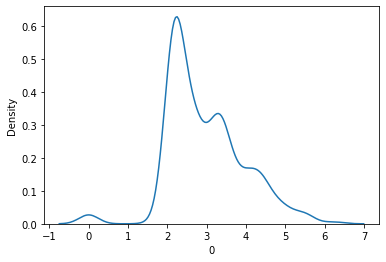

In [74]:
print("Skew is : " , pd.DataFrame(new_array).skew())
sns.kdeplot(pd.DataFrame(new_array)[0])

Notie how the graph changed, and the skewness is close to zero

Now as we ahve created our transformer, we will be adding some functionalities to the transformer like 
* iterating over a list

For this dummy we will be adding the `Age` column too. 

In [75]:
sample_data = data[["Fare" , "Age"]]

#################
Skewness is :  4.787316519674893


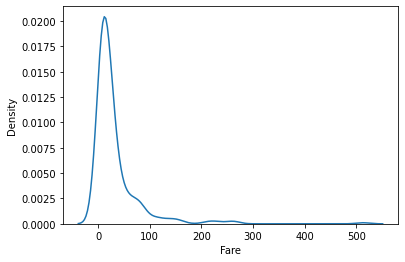

#################
Skewness is :  0.38910778230082704


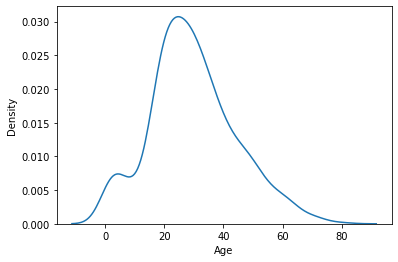

In [76]:
for i in sample_data.columns:
    print("#################")
    print("Skewness is : " , sample_data[i].skew())
    sns.kdeplot(sample_data[i])
    plt.show()

As we can see the `skewness` of the column `age` is already good, but it will still help to improve our transformer. Lets try to iterate firstly over these columns

In [77]:
for i in sample_data:
    print(i)

Fare
Age


Now we will add both our codes 

In [78]:
def log_output(value):
    return np.log1p(value)

for i in sample_data:
    new_array = np.empty(shape = (1 , 1))
    for j in sample_data[i]:
        new_array = np.vstack([new_array , log_output(j)])

    new_array = np.delete(new_array , 0 , 0)

But there is a problem, we are not actually generating output with two different array, we are just overalpping the output of these two. 

We need to horizonatally stack the arrays to get an output. For this we will be using `np.hstack` and making a new empty array 

In [79]:
def log_output(value):
    return np.log1p(value)

output_array = np.array([])
for i in sample_data:
    new_array = np.empty(shape = (1 , 1))
    for j in sample_data[i]:
        new_array = np.vstack([new_array , log_output(j)])

    new_array = np.delete(new_array , 0 , 0)

    output_array = np.hstack([output_array , new_array])

ValueError: ignored

We got the same error as before, for this we just need to change the shape to $(1 , 1)$

In [80]:
def log_output(value):
    return np.log1p(value)

output_array = np.empty(shape = (1 , 1))
for i in sample_data:
    new_array = np.empty(shape = (1 , 1))
    for j in sample_data[i]:
        new_array = np.vstack([new_array , log_output(j)])

    new_array = np.delete(new_array , 0 , 0)

    output_array = np.hstack([output_array , new_array])

ValueError: ignored

Opps the same error again, but the size demand is now of $(891 , 1)$, wait wait wait, we have seen this somewhere else.

This is the actual size of the array we passes, so in short we need to make an empty array of this shape, lets try this now 

In [81]:
def log_output(value):
    return np.log1p(value)

output_array = np.empty(shape = sample_data.shape)
for i in sample_data:
    new_array = np.empty(shape = (1 , 1))
    for j in sample_data[i]:
        new_array = np.vstack([new_array , log_output(j)])

    new_array = np.delete(new_array , 0 , 0)

    output_array = np.hstack([output_array , new_array])

And now it works good, lets see this in a form of a dataframe

In [82]:
output_array_df = pd.DataFrame(output_array)

In [83]:
output_array_df

,0,1,2,3
0,6.943030e-310,6.943030e-310,2.110213,3.135494
1,3.908527e-316,3.908527e-316,4.280593,3.663562
2,4.940656e-324,3.908548e-316,2.188856,3.295837
3,4.940656e-324,3.908531e-316,3.990834,3.583519
4,1.185758e-322,6.942959e-310,2.202765,3.583519
...,...,...,...,...
886,NaN,3.194312e-284,2.639057,3.332205
887,1.156023e-289,1.793515e-299,3.433987,2.995732
888,7.161721e-280,1.523133e-276,3.196630,NaN
889,NaN,NaN,3.433987,3.295837


Wait this is now what we expected, Why there are $4$ column, instead of $2$. 

This is because we are again stacking the arrays, not replacing them, so we need to drop these values with each iteration 

In [84]:
def log_output(value):
    return np.log1p(value)

output_array = np.empty(shape = sample_data.shape)
for i in sample_data:
    new_array = np.empty(shape = (1 , 1))
    for j in sample_data[i]:
        new_array = np.vstack([new_array , log_output(j)])

    new_array = np.delete(new_array , 0 , 0)

    output_array = np.hstack([output_array , new_array])
    output_array = np.delete(output_array , 0 , 1)

In [85]:
output_array_df = pd.DataFrame(output_array)
output_array_df

,0,1
0,2.110213,3.135494
1,4.280593,3.663562
2,2.188856,3.295837
3,3.990834,3.583519
4,2.202765,3.583519
...,...,...
886,2.639057,3.332205
887,3.433987,2.995732
888,3.196630,NaN
889,3.433987,3.295837


And we got the pergect value, lets try to plot this on a graph now 

Skewness is :  0.3949280095189306


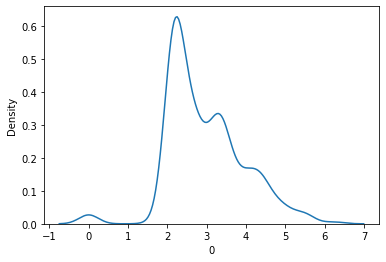

Skewness is :  -1.8774882259647614


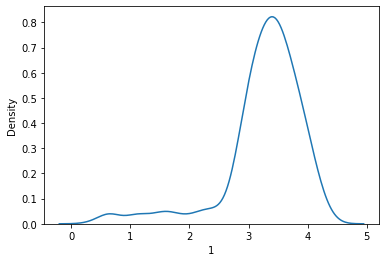

In [86]:
for i in output_array_df.columns:
    print("Skewness is : " , output_array_df[i].skew())
    sns.kdeplot(output_array_df[i])
    plt.show()

Notice how the skewness in `Age` actually got worse, So the function transformer always do not works best on all the scenarios, we need to specify where to put the transformer and where to not 

Now lets just do a little bit of beautifying 

In [87]:
def log_output(value):
    return np.log1p(value)

def function_transformer(array):

    output_array = np.empty(shape = array.shape)

    if len(array.shape) == 1:
        new_array = np.empty(shape = (1 , 1))
        for i in array:
            new_array = np.vstack([new_array , log_output(i)])

        new_array = np.delete(new_array , 0 , 0)

        return new_array

    else :
        for i in array:
        
            new_array = np.empty(shape = (1 , 1))
        
            for j in array[i]:
        
                new_array = np.vstack([new_array , log_output(j)])

            new_array = np.delete(new_array , 0 , 0)

            output_array = np.hstack([output_array , new_array])
            output_array = np.delete(output_array , 0 , 1)

        return output_array

Now as we have created a general function we just need to add its types 

# Square Transformer

Square Transformer is a type of transformer architecture commonly used in natural language processing (NLP) tasks such as language modeling, machine translation, and sentiment analysis. It is based on the original trance he architecture described in the article "Attention Is All You Need" by Vaswani et al. Suggested. (2017).

In Square Transformer, the input sequence is first embedded in a high-dimensional vector space. The embedding is then processed by a stack of transformer layers, each consisting of a multi-headed self-recognition mechanism and a feedforward neural network. The self-recognition mechanism allows the model to focus on different parts of the input sequence, while the feedforward network applies nonlinear transformations to the representations learned by the self-recognition layer.

One of Square Transformer's key features is that it uses positional encoding to provide the model with information about the position of each token in the input sequence. This is necessary because the transformer doesn't use iteration or convolution to process the sequence, so it can't directly capture the order of the tokens.

Square Transformer delivers state-of-the-art performance on a variety of NLP tasks, including language modeling, machine translation, and sentiment analysis. It has also been applied to other domains such as image processing and speech recognition. 

For making a sqaure transformer, we only need to define a function, and put a if a condition, wethere to use the log function or the square transformer

In [88]:
def log(value):
    return np.log1p(value)

def square(value):
    return np.sqaure(value)

def function_transformer(array , func = None):

    if func == None:
        print("Please enter a function")
        return None

    elif func == "log" or func == "square":

        output_array = np.empty(shape = array.shape)

        if len(array.shape) == 1:
            new_array = np.empty(shape = (1 , 1))
            for i in array:

                if func == "log":

                    new_array = np.vstack([new_array , log_output(i)])
                
                else:
                    
                    new_array = np.vstack([new_array , square(i)])
            
            new_array = np.delete(new_array , 0 , 0)

            return new_array

        else :
            
            for i in array:
            
                new_array = np.empty(shape = (1 , 1))
            
                for j in array[i]:
            
                    if func == "log":

                        new_array = np.vstack([new_array , log_output(i)])
                    else:
                    
                        new_array = np.vstack([new_array , square(i)])

                new_array = np.delete(new_array , 0 , 0)

                output_array = np.hstack([output_array , new_array])
                output_array = np.delete(output_array , 0 , 1)

            return output_array
    else:
        print("Please enter a valid function")
        return None

# Box Cox Transformer

The Box-Cox transformation is a statistical technique commonly used in machine learning that transforms a non-normal dependent variable to a normal distribution. This transformation helps improve the performance of certain machine learning algorithms that assume a normal distribution of the input data.

The Box-Cox transformation applies a power transformation to the data, and the value of the power parameter determines the order and direction of the transformation. Optimal values ​​of performance parameters are usually estimated using maximum likelihood estimation or cross-validation.

The Box-Cox transformer is particularly useful in regression analysis, where the dependent variable is often assumed to be normally distributed. Box-Cox transformation of the dependent variable satisfies the normality assumption and improves the accuracy of the regression model.

Overall, the Box-Cox transformer is a useful tool in machine learning to transform non-normal data into a normal distribution, improve the performance of certain algorithms, and help satisfy statistical assumptions. 

 $$ x_λ = \displaystyle \Bigg[\frac {\frac {x^{\lambda} - 1}{λ}}{log (x) } \frac {if}{if} \frac {λ != 0}{λ = 0}\Bigg]$$

 Geneally we try to find the value of $\lambda$ which minimizes the skewness, $\lambda$ depends upon the data, but generally its value lies between -5 to 5

First lets try to work on one array and then we will expand to multiple arrays 

In [89]:
sample_data = data["Fare"]

As the value lies between $(-5 , 5)$, We will first try to make transformer basesd on only range of $(-5 , 5)$. We simply need to iterate over a loop of this

In [90]:
for i in range(-5 , 5):
    print(i)

-5
-4
-3
-2
-1
0
1
2
3
4


Now we will try to populate a list of arrays which are populated corresponding to different values of $\lambda$, at this time we are not making changes, we are just trying to populate the array  

In [91]:
array_list = []

for i in range(-5 , 5):
    
    new_array = np.empty(shape = (1 , 1))

    for j in sample_data:

        new_array = np.vstack([new_array , j])

    new_array = np.delete(new_array , 0 , 0)

    array_list.append(new_array)

In [92]:
# array_list # Not printing this as it will take a lot of unescessory space, if you want to see, just comment it out

So new we have a list of arrays, lets populate another list, which is having the skewness of the array 

In [93]:
array_list = []
skew_list = []

for i in range(-5 , 5):
    
    new_array = np.empty(shape = (1 , 1))

    for j in sample_data:

        new_array = np.vstack([new_array , j])

    new_array = np.delete(new_array , 0 , 0)
    
    array_list.append(new_array)
    skew_list.append(pd.DataFrame(new_array).skew())

In [94]:
skew_list

[0    4.787317
 dtype: float64, 0    4.787317
 dtype: float64, 0    4.787317
 dtype: float64, 0    4.787317
 dtype: float64, 0    4.787317
 dtype: float64, 0    4.787317
 dtype: float64, 0    4.787317
 dtype: float64, 0    4.787317
 dtype: float64, 0    4.787317
 dtype: float64, 0    4.787317
 dtype: float64]

Notice all the values are same, this is beacuase we have not put any changes in the values, we will put them afterwards. 

So `skew_list` is just a series object, but we want only skewness, for this we will use the `[0]` index

In [95]:
array_list = []
skew_list = []

for i in range(-5 , 5):
    
    new_array = np.empty(shape = (1 , 1))

    for j in sample_data:

        new_array = np.vstack([new_array , j])

    new_array = np.delete(new_array , 0 , 0)
    
    array_list.append(new_array)
    skew_list.append(pd.DataFrame(new_array).skew()[0])

In [96]:
skew_list

[4.787316519674893,
 4.787316519674893,
 4.787316519674893,
 4.787316519674893,
 4.787316519674893,
 4.787316519674893,
 4.787316519674893,
 4.787316519674893,
 4.787316519674893,
 4.787316519674893]

As we have the list of skenwess at different values of $\lambda$, we just need to find the index of the smallest value, and we can find the corresponding index to the array list, to find the corresponding array 

In [97]:
array_list = []
skew_list = []

for i in range(-5 , 5):
    
    new_array = np.empty(shape = (1 , 1))

    for j in sample_data:

        new_array = np.vstack([new_array , j])

    new_array = np.delete(new_array , 0 , 0)
    
    array_list.append(new_array)
    skew_list.append(pd.DataFrame(new_array).skew()[0])

    output = array_list[np.argmin(skew_list)]

In [98]:
#output # Not printing this as it will take a lot of unescessory space, if you want to see, just comment it out

As now we have the array with the lowest skweness, We can make changes in how the array is processed on the basis of $\lambda$, lets make a function that take the valye of $\lambda$ and array, passes the output

In [99]:
def box_cox(value , lambdas):
    if lambdas == 0:
        return np.log1p(value)
    else :
        return (((value ** lambdas) - 1) / lambdas)

array_list = []
skew_list = []

for i in range(-5 , 5):
    
    new_array = np.empty(shape = (1 , 1))

    for j in sample_data:

        new_array = np.vstack([new_array , box_cox(j , i)])

    new_array = np.delete(new_array , 0 , 0)
    
    array_list.append(new_array)
    skew_list.append(pd.DataFrame(new_array).skew()[0])

    output = array_list[np.argmin(skew_list)]

ZeroDivisionError: ignored

Okay so we got an error related to $0$, box cox transformation have a limitation, that it connot be applied to a $0$, for here, we will just add $1$ to every number to overcome this 

In [100]:
def box_cox(value , lambdas):
    if lambdas == 0:
        return np.log1p(value)
    else :
        return ((((value + 1) ** lambdas) - 1) / lambdas)

array_list = []
skew_list = []

for i in range(-5 , 5):
    
    new_array = np.empty(shape = (1 , 1))

    for j in sample_data:

        new_array = np.vstack([new_array , box_cox(j , i)])

    new_array = np.delete(new_array , 0 , 0)
    
    array_list.append(new_array)
    skew_list.append(pd.DataFrame(new_array).skew()[0])

    output = array_list[np.argmin(skew_list)]

In [101]:
skew_list

[-7.523805402951357,
 -7.523798716363805,
 -7.523429871739085,
 -7.5010330775662295,
 -6.3574300087139735,
 0.3949280095189306,
 4.787316519674893,
 11.895617693803503,
 15.681022393085755,
 16.79858313851453]

Notice the change in values, but there is still a problem, let me show you

In [102]:
np.argmin(skew_list)

0

The index should be $5$ but is $0$, We need to make this values positive, still not actually changing them, we can do this by squaring every value

In [103]:
def box_cox(value , lambdas):
    if lambdas == 0:
        return np.log1p(value)
    else :
        return ((((value + 1) ** lambdas) - 1) / lambdas)

array_list = []
skew_list = []

for i in range(-5 , 5):
    
    new_array = np.empty(shape = (1 , 1))

    for j in sample_data:

        new_array = np.vstack([new_array , box_cox(j , i)])

    new_array = np.delete(new_array , 0 , 0)
    
    array_list.append(new_array)
    skew_list.append(pd.DataFrame(new_array).skew()[0] ** 2)

    output = array_list[np.argmin(skew_list)]

In [104]:
skew_list

[56.60764774148003,
 56.60754712435764,
 56.60199703497598,
 56.2654972307427,
 40.41691631569695,
 0.15596813270258453,
 22.91839945955213,
 141.50572031713097,
 245.8944632924569,
 282.1923954615847]

In [105]:
np.argmin(skew_list)

5

Now we got our perfect output, now lets try to implement the same on a list of columns 

In [106]:
sample_data = data[["Fare" , "Age"]]

In [107]:
def box_cox(value , lambdas):
    if lambdas == 0:
        return np.log1p(value)
    else :
        return ((((value + 1) ** lambdas) - 1) / lambdas)



output_array = np.empty(shape = sample_data.shape)

if len(sample_data.shape) == 1:

    array_list = []
    skew_list = []
    
    for i in range(-5 , 5):
    
        new_array = np.empty(shape = (1 , 1))

        for j in sample_data:

            new_array = np.vstack([new_array , box_cox(j , i)])

        new_array = np.delete(new_array , 0 , 0)
        
        array_list.append(new_array)
        skew_list.append(pd.DataFrame(new_array).skew()[0] ** 2)

        output_array = array_list[np.argmin(skew_list)]
elif len(sample_data.shape) != 1:
    
    for k in sample_data:

        array_list = []
        skew_list = []
        
        for i in range(-5 , 5):
            
            new_array = np.empty(shape = (1 , 1))

            for j in sample_data[k]:

                new_array = np.vstack([new_array , box_cox(j , i)])

            new_array = np.delete(new_array , 0 , 0)
            
            array_list.append(new_array)
            skew_list.append(pd.DataFrame(new_array).skew()[0] ** 2)

            output = array_list[np.argmin(skew_list)]

        output_array = np.hstack([output_array , output])

        output_array = np.delete(output_array , 0 , 1)

In [108]:
output_array

array([[ 2.1102132 , 22.        ],
       [ 4.28059312, 38.        ],
       [ 2.18885633, 26.        ],
       ...,
       [ 3.19663022,         nan],
       [ 3.4339872 , 26.        ],
       [ 2.1690537 , 32.        ]])

Now lets just put everything into a function and name the valriables properly 

In [109]:
def box_cox(value , lambdas):
    if lambdas == 0:
        return np.log1p(value)
    else :
        return ((((value + 1) ** lambdas) - 1) / lambdas)


def func(array):
    output_array = np.empty(shape = array.shape)

    if len(array.shape) == 1:

        array_list = []
        skew_list = []
        
        for bc_constant in range(-5 , 5):
        
            new_array = np.empty(shape = (1 , 1))

            for values in array:

                new_array = np.vstack([new_array , box_cox(values , bc_constant)])

            new_array = np.delete(new_array , 0 , 0)
            
            array_list.append(new_array)
            skew_list.append(pd.DataFrame(new_array).skew()[0] ** 2)

            output_array = array_list[np.argmin(skew_list)]
        
        return output_array

    elif len(array.shape) != 1:

        for columns in array:

            array_list = []
            skew_list = []
            
            for bc_constant in range(-5 , 5):
                
                new_array = np.empty(shape = (1 , 1))

                for values in array[columns]:

                    new_array = np.vstack([new_array , box_cox(values , bc_constant)])

                new_array = np.delete(new_array , 0 , 0)
                
                array_list.append(new_array)
                skew_list.append(pd.DataFrame(new_array).skew()[0] ** 2)

                output = array_list[np.argmin(skew_list)]

            output_array = np.hstack([output_array , output])

            output_array = np.delete(output_array , 0 , 1)

        return output_array

    else :
        print("Please enter a valid input")

# Yeo Johnson Transformer

Yeo-Johnson transformation is a power transformation technique used for data normalization, scaling, and to handle skewed data distributions in statistical analysis and machine learning.

The Yeo-Johnson transformation is a modified version of the more common Box-Cox transformation, and it can handle both positive and negative values. The transformation works by applying a power function to the data that depends on a tuning parameter λ.

The Yeo-Johnson transformation has several advantages over other transformations. First, it can handle both positive and negative values, which is useful when working with data that includes both positive and negative values. Second, it can handle zero and negative values, which is useful when working with data that includes zero values. Third, it can handle skewed data distributions, which is useful when the data has a non-normal distribution.

In summary, the Yeo-Johnson transformation is a flexible and powerful tool for data normalization and handling skewed data distributions in statistical analysis and machine learning.

In [110]:
def yeo_johnson(value , lambdas):
    if value >= 0:
        if lambdas == 0:
            return (np.log1p(value))
        else:
            return ((((value + 1) ** lambdas) - 1) / lambdas)
    if value < 0:
        if lambdas == 2: 
            return (-np.log1p(-value))
        else : 
            return ((- ((((- value) + 1) ** 2 - lambdas) - 1)) / (2 - lambdas))

def box_cox(value , lambdas):
    if lambdas == 0:
        return np.log1p(value)
    else :
        return ((((value + 1) ** lambdas) - 1) / lambdas)


def func(array , fun = None):
    
    output_array = np.empty(shape = array.shape)

    if len(array.shape) == 1:

        array_list = []
        skew_list = []
        
        for constant in range(-5 , 5):
        
            new_array = np.empty(shape = (1 , 1))

            for values in array:

                if fun == "box_cox":

                    new_array = np.vstack([new_array , box_cox(values , constant)])

                else :
                    new_array = np.vstack([new_array , yeo_johnson(values , constant)])
            
            new_array = np.delete(new_array , 0 , 0)
            
            array_list.append(new_array)
            skew_list.append(pd.DataFrame(new_array).skew()[0] ** 2)

            output_array = array_list[np.argmin(skew_list)]
        
        return output_array

    elif len(array.shape) != 1:

        for columns in array:

            array_list = []
            skew_list = []
            
            for constant in range(-5 , 5):
                
                new_array = np.empty(shape = (1 , 1))

                for values in array[columns]:

                    if fun == "box_cox":

                        new_array = np.vstack([new_array , box_cox(values , constant)])

                    else :
                        
                        new_array = np.vstack([new_array , yeo_johnson(values , constant)])

                new_array = np.delete(new_array , 0 , 0)
                
                array_list.append(new_array)
                skew_list.append(pd.DataFrame(new_array).skew()[0] ** 2)

                output = array_list[np.argmin(skew_list)]

            output_array = np.hstack([output_array , output])

            output_array = np.delete(output_array , 0 , 1)

        return output_array

    else :
        print("Please enter a valid input")

Now we will try to combine both our function and try to add the bypass of some edge cases

In [111]:
def log(value):
    
    return np.log1p(value)

def square(value):
    
    return np.sqaure(value)

def yeo_johnson(value , lambdas):
    
    if value >= 0:
    
        if lambdas == 0:
    
            return (np.log1p(value))
    
        else:
    
            return ((((value + 1) ** lambdas) - 1) / lambdas)
    
    if value < 0:
    
        if lambdas == 2: 
    
            return (-np.log1p(-value))
    
        else : 
    
            return ((- ((((- value) + 1) ** 2 - lambdas) - 1)) / (2 - lambdas))

def box_cox(value , lambdas):

    if lambdas == 0:

        return np.log1p(value)

    else :

        return ((((value + 1) ** lambdas) - 1) / lambdas)

def function_transformer(array , func = None):

    if func == None:
        print("Please enter a function")
        return None

    elif func == "log" or func == "square":

        output_array = np.empty(shape = array.shape)

        if len(array.shape) == 1:
            new_array = np.empty(shape = (1 , 1))
            for i in array:

                if func == "log":

                    new_array = np.vstack([new_array , log_output(i)])
                
                else:
                    
                    new_array = np.vstack([new_array , square(i)])
            
            new_array = np.delete(new_array , 0 , 0)

            return new_array

        else :
            
            for i in array:
            
                new_array = np.empty(shape = (1 , 1))
            
                for j in array[i]:
            
                    if func == "log":

                        new_array = np.vstack([new_array , log_output(i)])
                    else:
                    
                        new_array = np.vstack([new_array , square(i)])

                new_array = np.delete(new_array , 0 , 0)

                output_array = np.hstack([output_array , new_array])
                output_array = np.delete(output_array , 0 , 1)

            return output_array
    
    elif func == "box_cox" or func == "yeo_johnson":
        
        output_array = np.empty(shape = array.shape)

        if len(array.shape) == 1:

            array_list = []
            skew_list = []
            
            for constant in range(-5 , 5):
            
                new_array = np.empty(shape = (1 , 1))

                for values in array:

                    if func == "box_cox":

                        new_array = np.vstack([new_array , box_cox(values , constant)])

                    else :
                        new_array = np.vstack([new_array , yeo_johnson(values , constant)])
                
                new_array = np.delete(new_array , 0 , 0)
                
                array_list.append(new_array)
                skew_list.append(pd.DataFrame(new_array).skew()[0] ** 2)

                output_array = array_list[np.argmin(skew_list)]
            
            return output_array

        elif len(array.shape) != 1:

            for columns in array:

                array_list = []
                skew_list = []
                
                for constant in range(-5 , 5):
                    
                    new_array = np.empty(shape = (1 , 1))

                    for values in array[columns]:

                        if func == "box_cox":

                            new_array = np.vstack([new_array , box_cox(values , constant)])

                        else :
                            
                            new_array = np.vstack([new_array , yeo_johnson(values , constant)])

                    new_array = np.delete(new_array , 0 , 0)
                    
                    array_list.append(new_array)
                    skew_list.append(pd.DataFrame(new_array).skew()[0] ** 2)

                    output = array_list[np.argmin(skew_list)]

                output_array = np.hstack([output_array , output])

                output_array = np.delete(output_array , 0 , 1)

            return output_array

        else :
            print("Please enter a valid input")

    else :
        print("Please enter a valid function")
        return None